In [53]:
from pyspark import SparkContext
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.feature import IDF
from pyspark.ml.feature import StopWordsRemover

In [ ]:
sc = SparkContext(appName="Teste")

In [131]:
rdd = sc.textFile("pages/part-00000")
rdd = rdd.map(lambda line: line.split(" "))
rdd = rdd.map(lambda line: line[1:][0:])
# documents = rdd.map(lambda line: (line[0], line[1:]))
# documents = documents.map(lambda line: line[1:][0])
rdd.take(1)

["'Crise"]

In [20]:
hashingTF = HashingTF()
tf = hashingTF.transform(rdd)

In [21]:
#Tabela de frequencia inversa 1048576
tf.cache()
idf = IDF().fit(tf)
tfidf = idf.transform(tf)

#After we got the tf-idf, we can used it to find the most related article using keyword. 
#We need add this code to find the most related article with keyword.
# keywordTF = hashingTF.transform([keyword.lower()])
# keywordHashValue = int(keywordTF.indices[0])

In [22]:
#Tabela com frequencia minima
tf.cache()
idfIgnore = IDF(minDocFreq=2).fit(tf)
tfidfIgnore = idfIgnore.transform(tf)

In [48]:
print("tfidf:")
for each in tfidf.collect():
    print(each)

tfidf:
(1048576,[1475,1850,4561,4680,5025,5133,7775,8395,9062,11977,12057,12139,13862,16911,17904,20972,21078,21261,22352,22649,22699,24286,27527,28076,28088,29395,30491,30910,31692,32823,33913,35539,35877,36289,39097,39841,39983,40203,43015,45832,47883,50421,51155,51841,52512,53554,54363,54541,58089,61044,61288,62816,63749,64706,65485,65960,67405,67549,69071,69382,69478,69662,70939,71981,76012,76221,76867,79288,79335,79792,82242,84517,86710,90318,93890,99295,101141,101786,103153,103693,104701,105437,108707,112979,113415,115881,116313,117738,118315,119289,120049,120216,120308,120734,121471,121699,123523,124127,124334,125007,125195,126213,126511,127190,128183,128252,131842,131871,132630,134019,134325,134903,136221,137026,138953,140118,140256,140753,140954,142714,145577,147057,147235,147443,147781,151026,151034,151160,151696,152086,153870,156679,156829,159071,160698,161662,161870,162901,165111,165567,166932,167915,168798,168865,168887,169161,172368,172864,173013,173242,173459,173865,1759

[["('http://carta.fee.tche.br/article/crise-fiscal-incentivos-e-o-desenvolvimento-do-rs/',",
  "'Crise",
  'fiscal,',
  'incentivos',
  'e',
  'o',
  'desenvolvimento',
  'do',
  'RS',
  '|',
  '|',
  'Carta',
  'de',
  'Conjuntura\\nCarta',
  'de',
  'Conjuntura',
  'FEE\\nMenu\\nSEPLAG/RS\\t\\nApresentação\\nNúmero',
  'Atual\\nTodas',
  'as',
  'edições\\nCrise',
  'fiscal,',
  'incentivos',
  'e',
  'o',
  'desenvolvimento',
  'do',
  'RS\\nPor:',
  'Alexandre',
  'Alves',
  'Porsse\\nEdição:',
  'Ano',
  '16',
  'nº',
  '10',
  '-',
  '2007\\nÁrea',
  'temática:',
  'Economia\\nAssunto(s):',
  'condições',
  'econômicas,',
  'impostos,',
  'Rio',
  'Grande',
  'do',
  'Sul\\nO',
  'envio,',
  'pelo',
  'Executivo,',
  'da',
  'proposta',
  'orçamentária',
  'de',
  '2008',
  'à',
  'Assembléia',
  'Legislativa,',
  'prevendo',
  'um',
  'déficit',
  'de',
  'R$',
  '1,3',
  'bilhão,',
  'representa',
  'uma',
  'mudança',
  'na',
  'política',
  'de',
  'enfrentamento',
  'da',
  
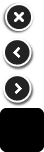

In [47]:
rdd.collect()

NameError: name 'numberofdocs_word' is not defined